#Data preprocessing

In [1]:
import nltk
import pandas as pd
# #Data preprocessing
df = pd.read_csv(r'C:\Users\baish\Downloads\liar_dataset (1)\train.tsv', sep='\t', names=["id","label","statement","subjects","speaker","speaker_job_title","state_info",'party_affiliation',"barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","context"]) 
#add your own dataset and column names (ensure it is csv or tsv file)

In [3]:
df.fillna("", inplace=True)

def csv_to_list(x):
    return x.split(",")

df['subjects'] = df['subjects'].apply(csv_to_list)

df = df.explode('subjects')

df.head(10)

C:\Users\baish\AppData\Local\Temp\ipykernel_22180\1808150571.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,energy,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,10540.json,half-true,When did the decline of coal start? It started...,history,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,10540.json,half-true,When did the decline of coal start? It started...,job-accomplishments,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,economy,charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,9028.json,half-true,The economic turnaround started at the end of ...,jobs,charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.


In [5]:
df.fillna("", inplace=True)

#Exploratory Data Analysis

## Label Distribution

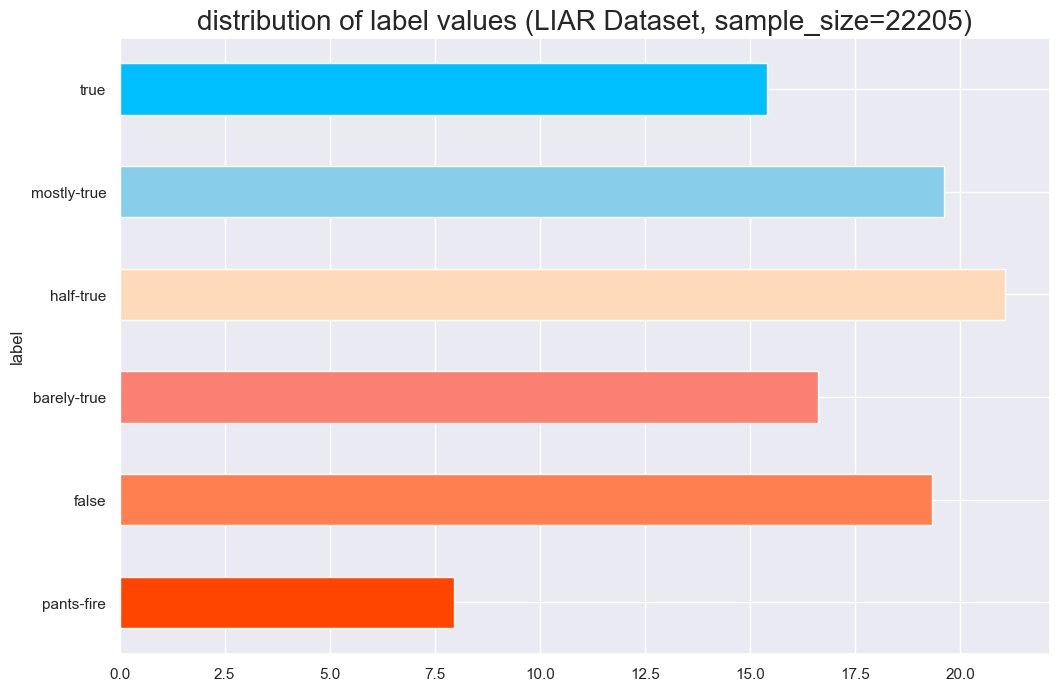

In [7]:
import seaborn as sns
sns.set()


def label_bar_chart(input_df: pd.DataFrame, title: str = "LIAR Dataset") -> None:

    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['label'].value_counts(normalize=True)

    def multiply_100(x):
        return x * 100

    # "apply" is a handy way to call a function on every row of data.
    label_frequencies = label_frequencies.apply(multiply_100)

    # bar chart ordering and  colors for readability.
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    colors = [
        'orangered', # pants-fire
        'coral', # false
        'salmon', # barely-true
        'peachpuff', # half-true
        'skyblue', # mostly-true
        'deepskyblue' # true
    ]

    label_frequencies = label_frequencies.reindex(index = labels)


    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(12, 8), color=colors)
    axis.set_title(f"distribution of label values ({title}, sample_size={len(input_df)})", size=20);



label_bar_chart(df)


## Speaker Analysis

In [9]:
num_unique_speakers = df['speaker'].nunique()
avg_statments = len(df) / num_unique_speakers

print(f"Unique speakers in dataset: {num_unique_speakers}")
print(f"Average statements made per speaker: {avg_statments}")

Unique speakers in dataset: 2911
Average statements made per speaker: 7.627962899347303


In [11]:
list(df['speaker'].unique())

['dwayne-bohac',
 'scott-surovell',
 'barack-obama',
 'blog-posting',
 'charlie-crist',
 'robin-vos',
 'republican-party-texas',
 'oregon-lottery',
 'duey-stroebel',
 'robert-menendez',
 'bernie-s',
 'mitt-romney',
 'doonesbury',
 'george-will',
 'national-republican-congressional-committee',
 'gwen-moore',
 'jack-lew',
 'dennis-richardson',
 'eric-bolling',
 'hillary-clinton',
 'greater-wisconsin-political-fund',
 'planned-parenthood-action-fund',
 'nancy-pelosi',
 'ted-nugent',
 'pamela-geller',
 'peter-kinder',
 'nicholas-kettle',
 'shelley-moore-capito',
 'rick-scott',
 'tom-cotton',
 'ted-cruz',
 'lee-leffingwell',
 'north-korea',
 'walking-dead',
 'kelly-ayotte',
 'marco-rubio',
 'keep-promise-1-pac',
 'rachel-maddow',
 'jerry-patterson',
 'chain-email',
 'john-boehner',
 'katrina-pierson',
 'rick-perry',
 'national-republican-senatorial-committee',
 'ken-cuccinelli',
 'andrew-cuomo',
 'sid-miller',
 'jim-barksdale',
 'david-raynor',
 'donald-trump',
 'john-mccain',
 'battlegroun

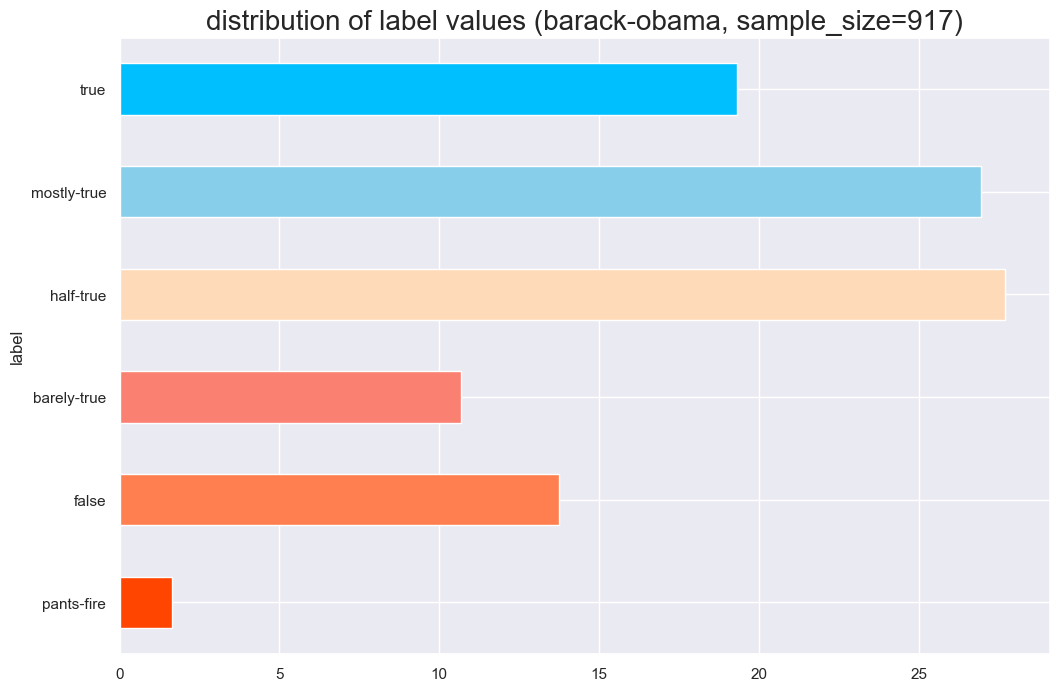

In [13]:
def speaker_bar_chart(input_df: pd.DataFrame, speaker: str) -> pd.DataFrame:

    # filters the input_df
    speaker_df = input_df[ input_df['speaker'] == speaker ]
    speaker_df.reset_index(inplace=True)

    # calls the bar chart function we created earlier
    label_bar_chart(speaker_df, title=speaker)

    return speaker_df

ret_df = speaker_bar_chart(df, 'barack-obama')

##Subject Analysis

In [15]:
num_unique_subjects = df['subjects'].nunique()

print(f"Unique subjects in dataset: {num_unique_subjects}")

Unique subjects in dataset: 143


In [17]:
list(df['subjects'].unique())

['abortion',
 'energy',
 'history',
 'job-accomplishments',
 'foreign-policy',
 'health-care',
 'economy',
 'jobs',
 'education',
 'candidates-biography',
 'ethics',
 'message-machine-2014',
 'voting-record',
 'elections',
 'new-hampshire-2012',
 'poverty',
 'state-budget',
 'federal-budget',
 'financial-regulation',
 'water',
 'bankruptcy',
 'population',
 'income',
 'corporations',
 'taxes',
 'message-machine',
 'crime',
 'diversity',
 'homeland-security',
 'terrorism',
 'technology',
 'campaign-advertising',
 'labor',
 'states',
 'unions',
 'workers',
 'climate-change',
 'environment',
 'government-regulation',
 'small-business',
 'bipartisanship',
 'consumer-safety',
 'corrections-and-updates',
 'market-regulation',
 'supreme-court',
 'city-government',
 'military',
 'pop-culture',
 'debt',
 'legal-issues',
 'stimulus',
 'pundits',
 'women',
 'immigration',
 'deficit',
 'iraq',
 'patriotism',
 'campaign-finance',
 'gays-and-lesbians',
 'kagan-nomination',
 'criminal-justice',
 'sex

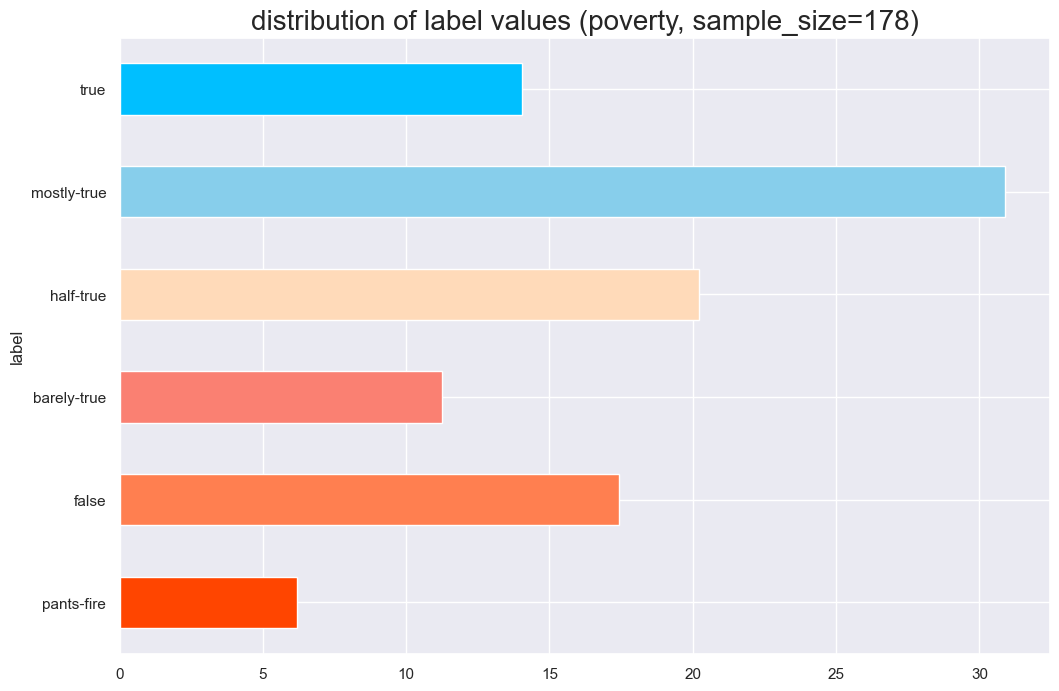

In [19]:
def subject_bar_chart(input_df: pd.DataFrame, subject: str) -> pd.DataFrame:

    # filters the input_df
    ret_df = input_df[ input_df['subjects'] == subject ]
    ret_df.reset_index(inplace=True)

    # calls the bar chart function we created earlier
    label_bar_chart(ret_df, title=subject)

    return ret_df


ret_df = subject_bar_chart(df[['label', 'subjects']], 'poverty')

#Data Preprocessing

In [21]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())  # Remove punctuation and lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and w.isalnum()] # Remove stopwords and lemmatize
    return " ".join(tokens)

df['processed_text'] = df["statement"].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baish\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\baish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [23]:
df["processed_text"].head()

0    say annies list political group support thirdt...
1    decline coal start started natural gas took st...
1    decline coal start started natural gas took st...
1    decline coal start started natural gas took st...
2    hillary clinton agrees john mccain voting give...
Name: processed_text, dtype: object

#data handling


In [25]:
label_mapping = {
    'true': 0,
    'mostly-true': 1,
    'half-true': 2,
    'barely-true': 3,
    'false': 4,
    'pants-fire': 5
}
df['label'] = df['label'].map(label_mapping)
assert df['label'].isnull().sum() == 0


In [27]:
df.columns

Index(['id', 'label', 'statement', 'subjects', 'speaker', 'speaker_job_title',
       'state_info', 'party_affiliation', 'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',
       'context', 'processed_text'],
      dtype='object')

In [ ]:
#df['combined_text'] = (
 #   "Subjects: " + df['subjects'] + ". Speaker: " + df['speaker'] +
  #  ". Context: " + df['context'] + ". Statement: " + df['statement']
#)


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['party_affiliation_encoded'] = label_encoder.fit_transform(df['party_affiliation'])
df['speaker_encoded'] = label_encoder.fit_transform(df['speaker'])
df['subjects_encoded'] = label_encoder.fit_transform(df['subjects'])
df['state_info_encoded'] = label_encoder.fit_transform(df['state_info'])

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
counts = ['barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts']

# Convert to numeric and handle invalid values
df[counts] = df[counts].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid entries become NaN
df[counts] = df[counts].fillna(0)  # Replace NaN with 0 or any other strategy (mean, median, etc.)

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
df[counts] = scaler.fit_transform(df[counts])


# Random Forest

In [114]:
rf_data=df.copy()

In [116]:
rf_data.columns

Index(['id', 'label', 'statement', 'subjects', 'speaker', 'speaker_job_title',
       'state_info', 'party_affiliation', 'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',
       'context', 'processed_text', 'party_affiliation_encoded',
       'speaker_encoded', 'subjects_encoded', 'state_info_encoded'],
      dtype='object')

In [118]:
selected_features = rf_data[['processed_text', 'subjects', 'speaker']]
target = rf_data['label']
selected_features = pd.get_dummies(selected_features, columns=['subjects', 'speaker'], drop_first=True)


In [170]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=8052)
text_features = vectorizer.fit_transform(selected_features['processed_text'])

print(f"Shape of text features: {text_features.shape}") 
additional_features = selected_features.drop('processed_text', axis=1).values
print(f"Shape of additional features: {additional_features.shape}")

# If the combined features exceed the maximum number of features, limit them
max_additional_features = 8052 - text_features.shape[1]
print(f"Using {max_additional_features} additional features to match the desired final size.")

# Adjust additional features to match the expected final size (8052 features)
if additional_features.shape[1] > max_additional_features:
    additional_features = additional_features[:, :max_additional_features]
final_features = np.hstack((text_features.toarray(), additional_features))


print(f"Shape of final features: {final_features.shape}")

X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size=0.2, random_state=42)


Shape of text features: (22205, 8052)
Shape of additional features: (22205, 3052)
Using 0 additional features to match the desired final size.
Shape of final features: (22205, 8052)


In [172]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8187345192524206
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       729
           1       0.77      0.85      0.81       836
           2       0.80      0.83      0.81       904
           3       0.88      0.79      0.83       758
           4       0.75      0.86      0.80       866
           5       0.96      0.80      0.87       348

    accuracy                           0.82      4441
   macro avg       0.84      0.81      0.83      4441
weighted avg       0.83      0.82      0.82      4441



In [182]:
import joblib

joblib.dump(random_forest_model, 'fake_news_rf_model.pkl')

try:
    check_is_fitted(vectorizer, attributes=["idf_"])
    print("Vectorizer is fitted.")
except NotFittedError:
    print("Vectorizer is not fitted. Please fit before saving.")

Vectorizer is fitted.


In [184]:
print(vectorizer.idf_)  # This will throw an error if the vectorizer is not fitted

[8.92867626 9.21635833 8.44316844 ... 8.52321115 8.92867626 9.21635833]


In [186]:
joblib.dump(vectorizer, 'tfidf_vectorizer_rf.pkl')

['tfidf_vectorizer_rf.pkl']

In [188]:
# Load artifacts
#this is to check whether teh vectorizer and model have the same number of features
rf_model = joblib.load('fake_news_rf_model.pkl')
rf_vectorizer = joblib.load('tfidf_vectorizer_rf.pkl')

# Check feature count expected by the model
print(f"Random Forest model expects: {rf_model.n_features_in_} features")

# Check the feature count of the vectorizer
print(f"Vectorizer produces: {len(rf_vectorizer.get_feature_names_out())} features")


Random Forest model expects: 8052 features
Vectorizer produces: 8052 features
